In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
full_dataset = pd.read_csv('train.csv')
divider = int(full_dataset.shape[0] * 0.8)

train_dataset = full_dataset[:divider]
test_dataset = full_dataset[divider:]


In [12]:
def data_transform(dataset):
    variables = dataset.drop('price_range',axis=1)
    variables_array = np.array(variables)
    results = dataset['price_range']
    results_array = np.array(results)

    return variables_array,results_array

In [5]:
variables,results = data_transform(train_dataset)

print(variables.shape,results.shape)

(1600, 20) (1600,)


Create and Train Model

In [6]:
model = keras.Sequential([
    layers.Dense(256, activation= tf.nn.relu, input_dim = 20),
    
    layers.Dropout(0.2),

    layers.Dense(256, activation= tf.nn.relu),

    layers.Dense(4, activation= tf.nn.softmax)
])

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(variables,results,batch_size=100,epochs=60)

Epoch 1/60
16/16 [==============================] - 0s 1ms/step - loss: 72.3774 - accuracy: 0.4144
Epoch 2/60
16/16 [==============================] - 0s 2ms/step - loss: 43.5945 - accuracy: 0.4694
Epoch 3/60
16/16 [==============================] - 0s 2ms/step - loss: 28.9168 - accuracy: 0.5006
Epoch 4/60
16/16 [==============================] - 0s 2ms/step - loss: 24.3237 - accuracy: 0.5025
Epoch 5/60
16/16 [==============================] - 0s 3ms/step - loss: 19.0880 - accuracy: 0.5119
Epoch 6/60
16/16 [==============================] - 0s 2ms/step - loss: 18.2943 - accuracy: 0.4994
Epoch 7/60
16/16 [==============================] - 0s 2ms/step - loss: 16.5015 - accuracy: 0.4812
Epoch 8/60
16/16 [==============================] - 0s 2ms/step - loss: 13.7475 - accuracy: 0.5219
Epoch 9/60
16/16 [==============================] - 0s 2ms/step - loss: 12.0655 - accuracy: 0.5306
Epoch 10/60
16/16 [==============================] - 0s 3ms/step - loss: 10.7347 - accuracy: 0.5475
Epoch 11/

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5376      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 72,196
Trainable params: 72,196
Non-trainable params: 0
_________________________________________________________________


Evaluate Model

In [10]:
variables_test,results_test = data_transform(test_dataset)

train_evaluate = model.evaluate(variables,results,batch_size=50, verbose=0)
test_evaluate = model.evaluate(variables_test,results_test,batch_size=50, verbose=0)

print(train_evaluate)
print(test_evaluate)

[0.957675576210022, 0.6862499713897705]
[1.339896559715271, 0.6449999809265137]


Progression of Training

In [4]:
losses = history.history['loss']
accuracies = history.history['accuracy']

NameError: name 'history' is not defined

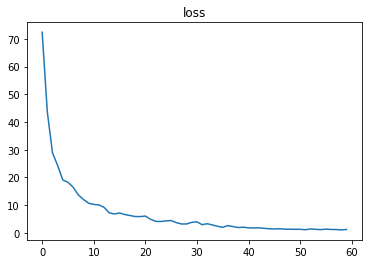

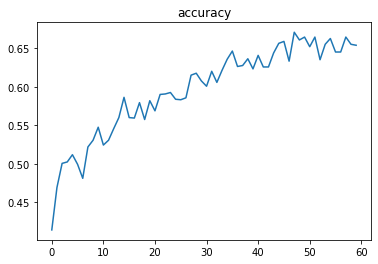

In [ ]:

plt.title("loss")
plt.plot(history.history['loss'], label='loss')

plt.show()

plt.title("accuracy")
plt.plot(history.history['accuracy'], label='accuracy')


plt.show()


In [ ]:
# model.save('keras_model.h5')

Model without spliting in test and train beforehand

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
def data_transform(dataset):
    variables = dataset.drop('price_range',axis=1)
    variables_array = np.array(variables)
    results = dataset['price_range']
    results_array = np.array(results)

    return variables_array,results_array

In [41]:
full_dataset = pd.read_csv('train.csv')
divider = int(full_dataset.shape[0] * 0.8)

train_dataset = full_dataset[:divider]
test_dataset = full_dataset[divider:]

In [90]:
model = keras.Sequential([
    layers.Dense(256, activation= tf.nn.relu, input_dim = 20),
    
    layers.Dropout(0.2),

    layers.Dense(256, activation= tf.nn.relu),

    layers.Dropout(0.2),

    layers.Dense(4, activation= tf.nn.softmax)
])

In [91]:
variables,results = data_transform(full_dataset)

In [92]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [93]:
history = model.fit(variables,results,batch_size=50,epochs=250,validation_split = 0.1)

Epoch 1/250
36/36 [==============================] - 0s 5ms/step - loss: 96.7959 - accuracy: 0.4261 - val_loss: 36.1215 - val_accuracy: 0.5150
Epoch 2/250
36/36 [==============================] - 0s 2ms/step - loss: 41.1843 - accuracy: 0.4511 - val_loss: 19.3496 - val_accuracy: 0.5050
Epoch 3/250
36/36 [==============================] - 0s 2ms/step - loss: 23.6147 - accuracy: 0.4756 - val_loss: 7.4219 - val_accuracy: 0.4850
Epoch 4/250
36/36 [==============================] - 0s 2ms/step - loss: 13.0853 - accuracy: 0.4517 - val_loss: 2.6064 - val_accuracy: 0.4800
Epoch 5/250
36/36 [==============================] - 0s 2ms/step - loss: 6.6791 - accuracy: 0.4700 - val_loss: 1.1892 - val_accuracy: 0.4050
Epoch 6/250
36/36 [==============================] - 0s 2ms/step - loss: 4.0532 - accuracy: 0.4317 - val_loss: 1.1360 - val_accuracy: 0.4900
Epoch 7/250
36/36 [==============================] - 0s 2ms/step - loss: 2.4734 - accuracy: 0.4461 - val_loss: 1.1294 - val_accuracy: 0.4150
Epoch 8

In [94]:
losses_train = history.history['loss']
accuracies_train = history.history['accuracy']

losses_test = history.history['val_loss']
accuracies_test = history.history['val_accuracy']

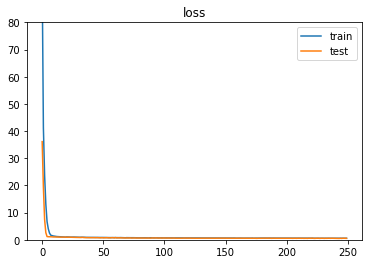

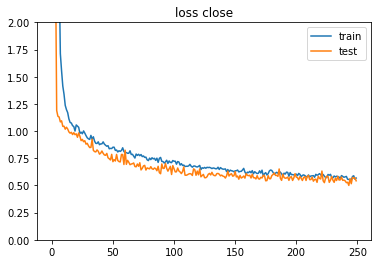

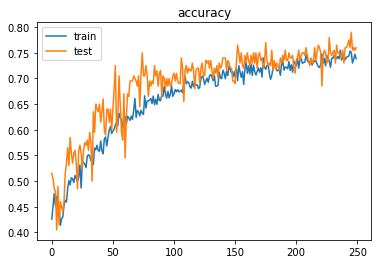

In [95]:

plt.title("loss")
plt.plot(losses_train, label='train')
plt.plot(losses_test, label='test')
plt.legend()
plt.ylim([0, 80])

plt.show()

plt.title("loss close")
plt.plot(losses_train, label='train')
plt.plot(losses_test, label='test')
plt.legend()
plt.ylim([0, 2])

plt.show()

plt.title("accuracy")
plt.plot(accuracies_train, label='train')
plt.plot(accuracies_test, label='test')
plt.legend()

plt.show()